<a href="https://colab.research.google.com/github/edgarbc/My_medium_posts/blob/main/semantic_segmentation_in_MONAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports
from PIL import Image
import matplotlib.pyplot as plt


In [7]:
!ls drive/MyDrive/Colab\ Notebooks/xray_data

100.png  10.png   13.png  22.png  31.png  40.png  4.png   59.png  68.png  77.png  86.png  95.png
101.png  110.png  14.png  23.png  32.png  41.png  50.png  5.png   69.png  78.png  87.png  96.png
102.png  111.png  15.png  24.png  33.png  42.png  51.png  60.png  6.png   79.png  88.png  97.png
103.png  112.png  16.png  25.png  34.png  43.png  52.png  61.png  70.png  7.png   89.png  98.png
104.png  113.png  17.png  26.png  35.png  44.png  53.png  62.png  71.png  80.png  8.png   99.png
105.png  114.png  18.png  27.png  36.png  45.png  54.png  63.png  72.png  81.png  90.png  9.png
106.png  115.png  19.png  28.png  37.png  46.png  55.png  64.png  73.png  82.png  91.png  preproc
107.png  116.png  1.png   29.png  38.png  47.png  56.png  65.png  74.png  83.png  92.png
108.png  11.png   20.png  2.png   39.png  48.png  57.png  66.png  75.png  84.png  93.png
109.png  12.png   21.png  30.png  3.png   49.png  58.png  67.png  76.png  85.png  94.png


In [13]:
!pwd


/content


In [14]:
# definitions and parameters
datadir = '/content/drive/MyDrive/Colab Notebooks/xray_data/'
img_fname = '100.png'
mask_fname = '100.png'
pred_mask_fname = '100.png'

In [15]:
# load images
img = Image.open(datadir+img_fname)

mask = Image.open(datadir+ mask_fname)

pred_mask = Image.open(datadir + pred_mask_fname)


<Figure size 1000x1000 with 0 Axes>

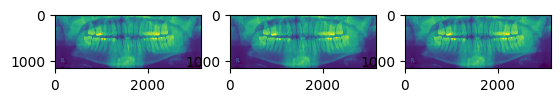

In [20]:
# display images
fig = plt.figure(figsize=(10,10))

fig, ax = plt.subplots(1,3)

ax[0].imshow(img)
ax[1].imshow(mask)
ax[2].imshow(pred_mask)


In [ ]:
def calculate_iou(mask_true, mask_pred):
  '''
  Returns the intersection over union (or Jaccard) index to evaluate the
  matching of the two masks

  Inputs:
  mask_true: np.array
  mask_pred: np.array

  Returns:
  iou_index: float
  '''
  # calculates the area of the intersection of the two masks
  intersection = np.sum(mask_pred[mask_true==1])

  # calculate the area of the union of the masks
  union = np.sum(mask_true) + np.sum(mask_pred)

  return (intersection / union)